In [1]:
import os
import cv2
import math
import glob
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    urlretrieve(url, save_path)

    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
         print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/0o5yqql1ynx31bi/opencv_bootcamp_assets_NB9.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB9.zip")
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   


Panoramas:

Steps to create panoramas:
1. Find keypoints for all images
2. Find pairwise correspondences
3. Estimate pairwise Homographies
4. Refine Homographies
5. Stich with Blending

In [4]:
imagesfile = glob.glob(f"boat{os.sep}*")
imagesfile.sort()

images=[]
for filename in imagesfile:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
num_images = len(images)


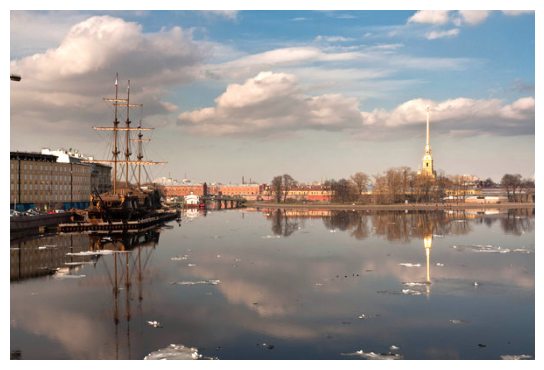

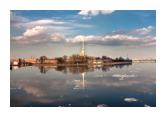

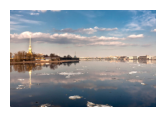

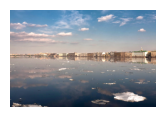

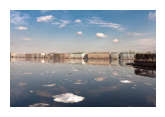

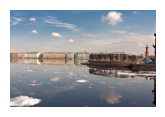

In [5]:
plt.figure(figsize=[30, 10])
num_cols = 3
num_rows = math.ceil(num_images/ num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.axis("off")
    plt.imshow(images[i])
    plt.show()

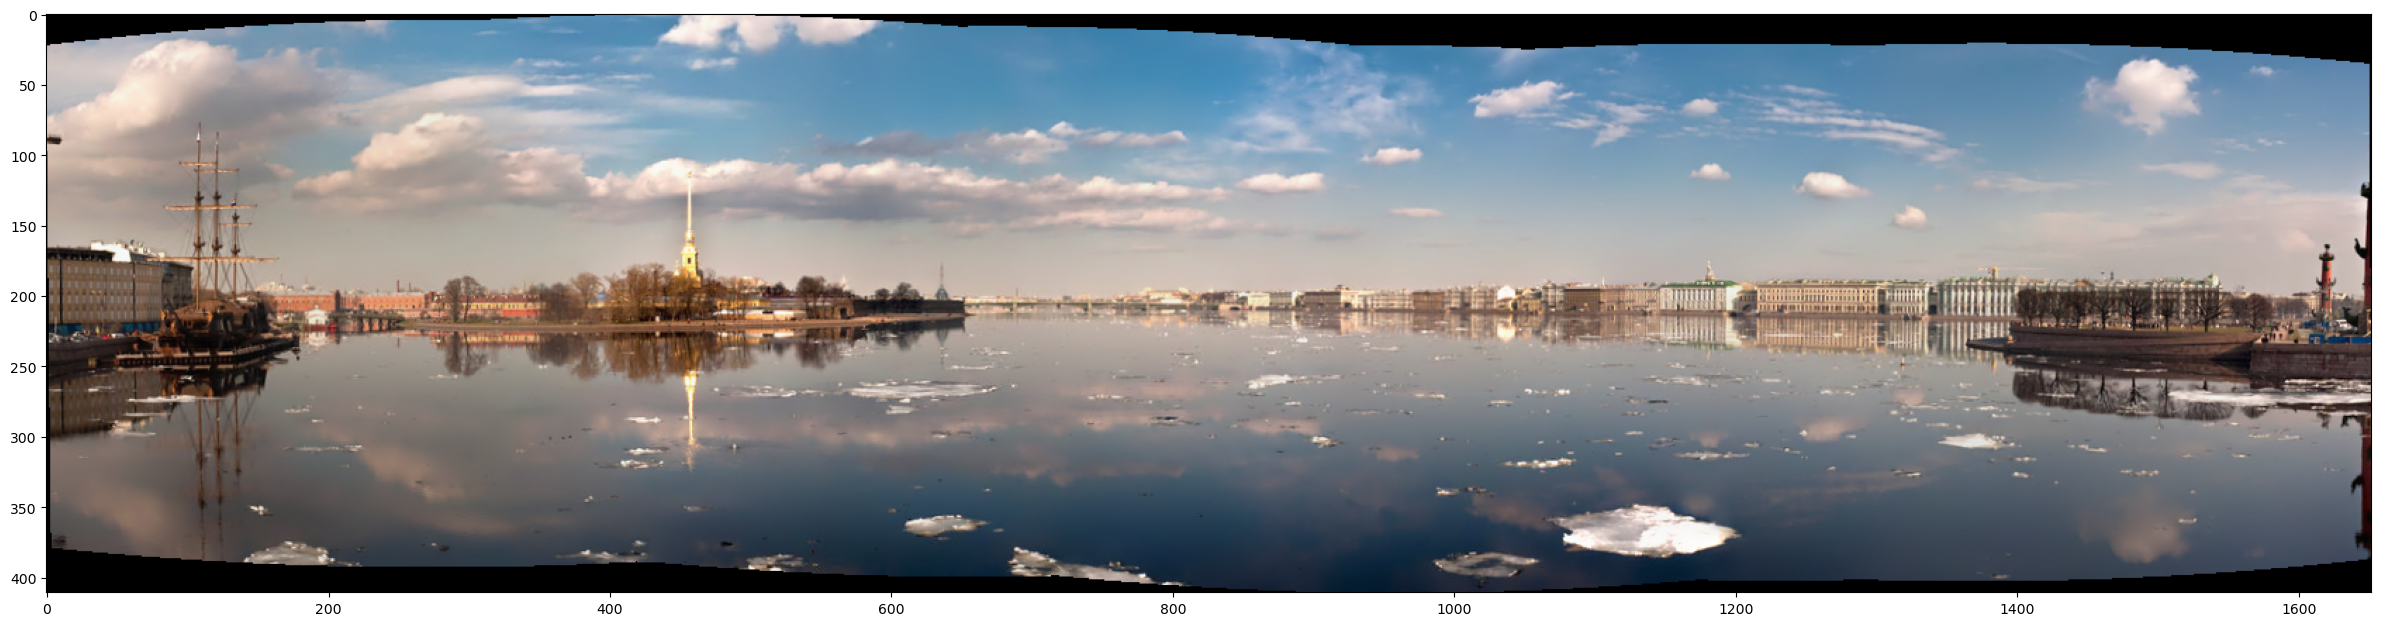

In [7]:
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.imshow(result)
    plt.show()

The purpose of image blending in image stitching is to smooth out the seams between the imageswhich ensures that the stitching prcoess produces a seamless panorama.

The process of creating a panorama in OpenCV is the merging multiple images to create a wide-angle image.

